(app:scattering-angle)=
# Scattering by the Yukawa potential

A particle elastically collides with another particle through a spherical potential $U(r)$ where $r$ is the distance between the particles.  As we discussed in {numref}`app:closet-approach`, the scattering angle is given by $\theta = \pi - 2 \phi$ where

$$
\phi = \int_{r_0}^{\infty} \frac{b}{r^2} \frac{1}{\sqrt{1 - \displaystyle\frac{b^2}{r^2}-\displaystyle\frac{U(r)}{E}}} dr\, .
$$(eq:scattering-angle1)

We already developed a numerical method to find the closest distance $r_0$ in {numref}`app:closet-approach`.  However, we are still not quite ready to evaluate the integral because it is doubly improper.  First, the upper integral limit is infinity.  Secondly, the integrand diverges at the closest distance.


The former issue can be solved by the standard method discussed in {numref}`sec:unbound-interval`.
Introducing a variable $u = \displaystyle\frac{1}{r}$. Eq. {eq}`eq:scattering-angle1` is transformed to

$$
\phi = \int_0^{u_0} \frac{b}{\sqrt{1-b^2 u^2 -\frac{U(1/u)}{E}}}\;  du
$$(eq:scattering-angle2)

where the upper integral limit is $u_0=1/r_0$.  You might worry about $U(1/u)$ at $u=0$.  The interaction potential usually vanishes when two particles are separated by the infinite distance.  Hence, $\displaystyle\lim_{u\rightarrow 0} U(1/u) = 0$.  There seems no difficulty with respect to the first improperness.

The second improperness is a bit more complicated. We need to resolve the issue on a case-by-case basis.  Let use try to find the scattering angle for the Yukawa potential used in the nuclear physics (also known as screened Coulomb potential in the condensed matter physics):

$$
U(r) = \frac{k}{r} e^{-r/a}
$$

where $k$ and $a$ are constants indicating the strength  and the range of the interaction, respectively.  The scattering angle for this potential is given by the following integral:

$$
\phi_Y = \int_0^{u_0} \frac{b}{\sqrt{1-b^2 u^2 -\frac{u k e^{-1/u a}}{E}}}  du
$$(eq:scattering-angle-Y)

To remove the singularity, we must find an analytically solvable integral that has the same singularity as in Eq. {eq}`eq:scattering-angle-Y`.  That seems difficult but possible.  We recall that In the Rutherford scattering taught in a classical mechanics (or modern physics) course{cite}`Goldstein2001`.  It is a scattering by a Coulomb potential $U_c(r)=C/r$ where $C$ is a constant to be determined. The scattering angle for the Coulomb potential is given by a similar integral

$$
\phi_C = \int_0^{u_0} \frac{b}{\sqrt{1-b^2 u^2 -\frac{C u}{E}}}  du
$$(eq:scattering-angle-C)

It turns out that the integration can be done analytically{cite}`Goldstein2001` and the solution is

$$
\phi_C= \frac{\pi}{2} - \tan^{-1}\left(\frac{C}{2 b E}\right)
$$

Now, we need to make the two integrals Eqs. {eq}`eq:scattering-angle-Y` and {eq}`eq:scattering-angle-C` have the same singularity,   that is

$$
1-b^2 u_0^2 -\frac{u_0 k e^{-1/u_0 a}}{E} = 1-b^2 u_0^2 -\frac{C u_0}{E}
$$

which is satisfied if $C=k e^{-1/u_0 a}$.  Notice that the strength of the Coulomb potential is smaller the Yukawa potential so that the two potentials have the same closest approach.

At last, we are ready to calculate the scattering angle for the Yukawa potential.  We numerically evaluate the non singular part of integral, which is the difference between the two scatterings, 

$$
\Delta \phi = \phi_Y - \phi_C = \int_0^{u_0} \frac{b}{\sqrt{1-b^2 u^2 -\frac{u e^{-1/u a}}{E}}} - \frac{b}{\sqrt{1-b^2 u^2 -\frac{C u}{E}}} du 
$$

By adding the analytic solution of the Rutherford scattering, we obtain

$$
\phi_Y = \Delta \phi + \phi_C.
$$

It is always a good idea to visualize the equations you are working on.  Let us plot the integrands.

impact parameter  b =  0.50000
collision energy  E =  1.00000
closest approach r0 =  0.77942


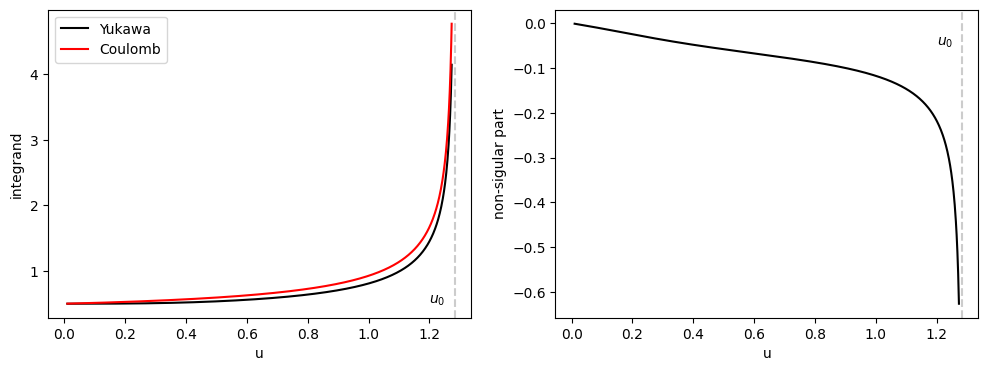

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# parameters for the potential
# strength of the interaction
k = 1
# range
a = 1

# define integrands.  
# dynamical parameters b and E must be defined before calling them
# integrand for the Yukawa potential
def fY(u):
    return b/np.sqrt(1 - b**2 * u**2 - u*k*np.exp(-1/(u*a))/E)
    
# integrand for the Coulomb potential
def fC(u):
    return b/np.sqrt(1 - b**2 * u**2 - u*k*np.exp(-1/(u0*a))/E)

def df(u):
    return fY(u)-fC(u)
    
# the inverse of the closest approach
def umax(q):
    def f(u):
        return 1 - b**2 * u**2 - u*k*np.exp(-1/(u*a))/E
    return newton(f,q)

# set impact parameter
b=0.5*a
print("impact parameter  b = {0:8.5f}".format(b))
# set collision energy
E=1.0
print("collision energy  E = {0:8.5f}".format(E))
# find the closest approach
u0=umax(b)
print("closest approach r0 = {0:8.5f}".format(1/u0))

# set number of data points
N = 1000

# set evaluation points (avoid the divide-by-zero error)
u=np.linspace(0.01,u0-0.01,N)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

plt.plot(u,fY(u),'-k',label="Yukawa")
plt.plot(u,fC(u),'-r',label="Coulomb")
plt.xlabel("u")
plt.ylabel("integrand")
plt.axvline(x = u0, color = '0.8', linestyle = '--')
plt.text(1.2,0.5,r"$u_0$")
plt.legend(loc=2)

plt.subplot(1,2,2)
plt.plot(u,fY(u)-fC(u),'-k')
plt.xlabel("u")
plt.ylabel("non-sigular part")
plt.axvline(x = u0, color = '0.8', linestyle = '--')
plt.text(1.2,-0.05,r"$u_0$")

plt.show()

    Strength of the potential k= 1.00000
Decay length of the potential a= 1.00000
             Collision energy E= 1.00000


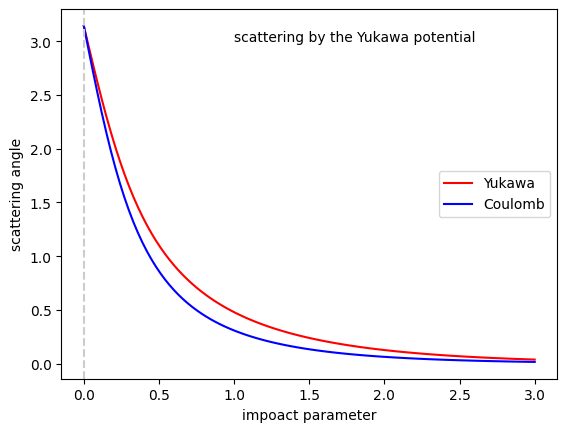

In [2]:
from scipy.integrate import simpson

# set impacto parameters
s=np.linspace(0.0,3.0,101)

# prepare the angle as an array
thetaY=[]
thetaC=[]

# head-on collision (b=0)
thetaY.append(np.pi)
thetaC.append(np.pi)

# for b>0
for i in range(1,101):
    b=s[i]
    u0=umax(b)
    u=np.linspace(0.0,u0,N)

    # avoid divided-by-zero at u=0 and u=u0
    u[0]=0.05
    u[N-1]=u0-0.05
    f=df(u)

    # enter the correct values at u=0 and u=u0
    f[0]=0
    u[0]=0
    f[N-1]=0.0
    u[N-1]=u0

    # evaluate the non-singular part
    dphi=simpson(f,x=u)

    # scattering angle for Coulomb potential
    C=k*np.exp(-1/(a*u0))
    phiC=np.pi/2 - np.arctan(C/(2*b*E))

    # scattering angle of Yukawa potential
    phiY = phiC + dphi

    # get theta from phi
    thetaY.append(np.pi - 2*phiY)
    thetaC.append(np.pi - 2*phiC)
    
print("    Strength of the potential k={0:8.5f}".format(k))
print("Decay length of the potential a={0:8.5f}".format(a))
print("             Collision energy E={0:8.5f}".format(E))

plt.plot(s,thetaY,'-r',label="Yukawa")
plt.plot(s,thetaC,'-b',label="Coulomb")
plt.xlabel("impoact parameter")
plt.ylabel("scattering angle")
plt.axvline(x = 0, color = '0.8', linestyle = '--')
plt.text(1.0,3.0,"scattering by the Yukawa potential")
plt.legend(loc=5)
plt.show()

How do you know that this result is correct?  You might get confused since the scattering angle of the Coulomb potential is smaller than that of the Yukawa potential despite that the Coulomb potential has longer interaction range. Recall that the the strength of the Coulomb potential is adjusted so that the two potentials share the same closest approach, suggesting that the two scattering angles are similar. As the result of the adjustment, the Coulomb potential is weaker than the Yukawa potential.  Therefore the scattering angle of the Coulomb potential is smaller than the that of the Yukawa potential.   We will calculate the same quantity by numerically solving the corresponding Newton equation in {numref}`ch:ODE`, which is in a good agreement with the present results. 


___

Updated on 4/18/2024 by R. Kawai